In [1]:
# git clone https://github.com/alsinmr/pyRelaxSim.git
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync')
sys.path.append('/Users/albertsmith/Documents/GitHub')
import pyRelaxSim as RS
import numpy as np
from numpy import pi
RS.Defaults['parallel']=False
RS.Defaults['rtype']=np.float32
RS.Defaults['ctype']=np.complex64

In [2]:
%matplotlib notebook

In [3]:
ex0=RS.ExpSys(v0H=600,vr=0,Nucs=['1H','1H'],pwdavg=RS.PowderAvg(q=3)[25],n_gamma=1)
ex0.set_inter(Type='CS',i=0,ppm=4)
ex0.set_inter(Type='dipole',i0=0,i1=1,delta=0)
ex1=ex0.copy()
ex1.set_inter(Type='CS',i=0,ppm=6)
ex1.set_inter(Type='dipole',i0=0,i1=1,delta=60000)
ex1.pwdavg=ex0.pwdavg

In [7]:
L=RS.Liouvillian((ex0,ex1))
tau_freq=1e-4
tau_contact=1e-7
kex=[[-1/tau_freq,1/tau_contact],[1/tau_freq,-1/tau_contact]]
L.kex=kex
L.clear_relax()
L.add_relax(Type='T1',i=0,T1=2,Peq=True)
L.add_relax(Type='T2',i=0,T2=1)
L.add_relax(Type='T1',i=1,T1=2,Peq=True)
L.add_relax(Type='T2',i=1,T2=1)

<IPython.core.display.Javascript object>


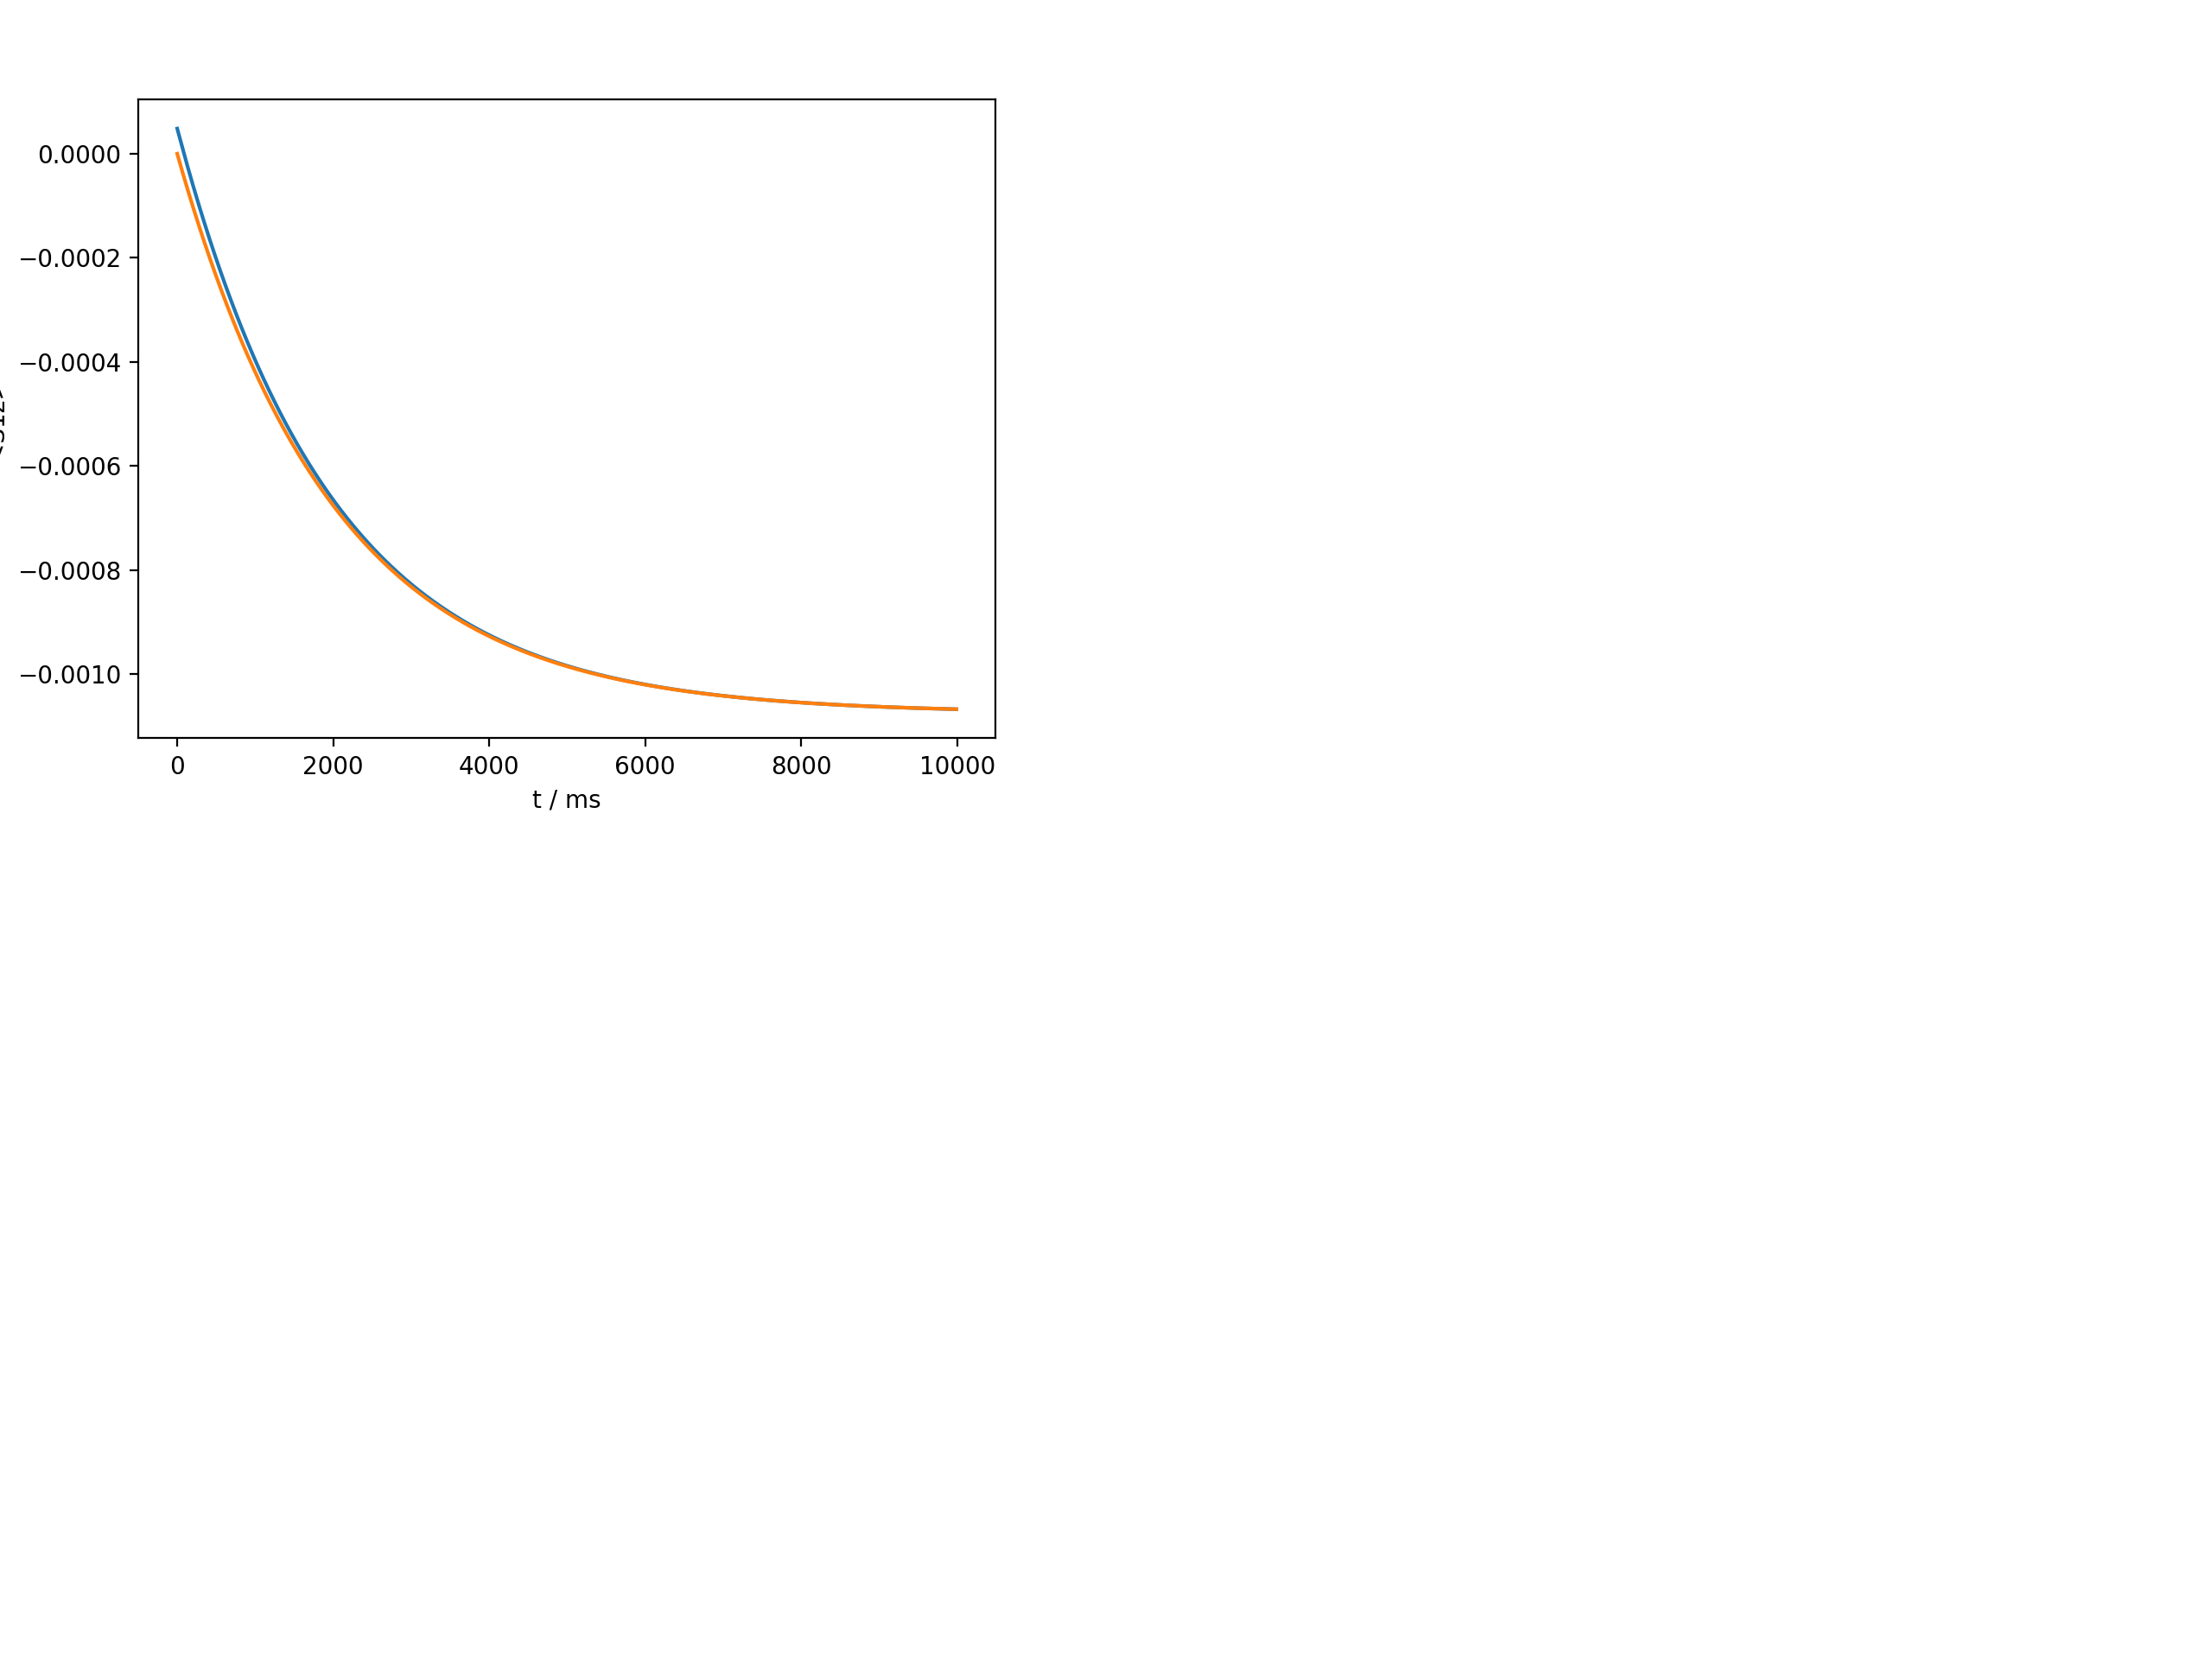

<AxesSubplot:xlabel='t / ms', ylabel='<S1z>'>

In [8]:
rho=RS.Rho(rho0='S0z',detect=['S0z','S1z'])
U=L.U(Dt=.01)
rho.clear()
rho.DetProp(U,n=1000)
_,ax=plt.subplots(1,1)
rho.plot(det_num=0,ax=ax)
rho.plot(det_num=1,ax=ax)

In [10]:
ex0.Peq

array([4.83145275e-05, 4.83145275e-05])